# Credit scoring use case

## Use different deep learning architectures to build a credit scoring model

- Load data and impute missing values
- Model 1: First basic linear model
- Model 2: Deep model with 2 layers
- Model 3: Deep model with 5 layers
- Model 4: Final model with regularization and early stopping

## Data
- Give me some credit Kaggle competition. 
- Downloaded from: https://www.kaggle.com/c/GiveMeSomeCredit

In [2]:
# Header
from __future__ import print_function

import numpy as np
import pandas as pd
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) 

import tensorflow as tf
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  1.3.0


In [3]:
# Import data
data_path='/Users/jorge/data/training/finance/credit_scoring/'

data = pd.read_csv(os.path.join(data_path,'cs-training.csv'), index_col=0)

data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
# Check missing values

print('Count of missing values \n-----------------------')
print(data.isnull().sum(axis=0))

Count of missing values 
-----------------------
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [5]:
# Generate missing imputators variables.
data['MonthlyIncomeMissing'] = data.apply(lambda row: 1 if pd.isnull(row['MonthlyIncome']) else 0, axis=1)
data['NumberOfDependentsMissing'] = data.apply(lambda row: 1 if pd.isnull(row['NumberOfDependents']) else 0, axis=1)

# Impute missing values by the mean
data = data.fillna(data.mean())


In [6]:
# Analyze distributions
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncomeMissing,NumberOfDependentsMissing
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.198207,0.026160
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404,0.398650,0.159611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dfb05c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d8855c0>]], dtype=object)

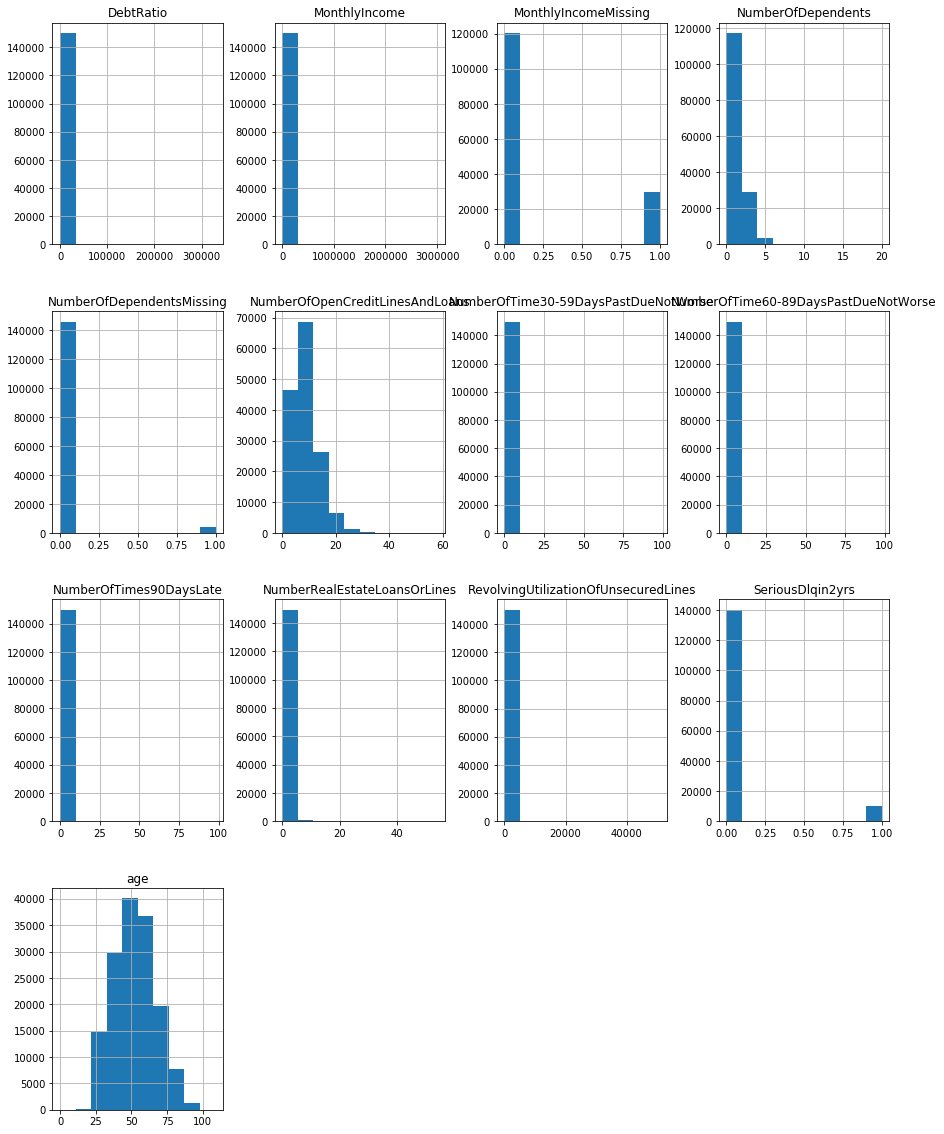

In [7]:
# Plot histograms
plt.rcParams['figure.figsize'] = (15, 20) 
data.hist(data.columns)


In [7]:
# Transform by log
data['DebtRatioLog'] = np.log(data['DebtRatio']+1)
data['MonthlyIncomeLog'] = np.log(data['MonthlyIncome']+1)
data['RevolvingUtilizationOfUnsecuredLinesLog'] = np.log(data['RevolvingUtilizationOfUnsecuredLines']+1)

data['NumberOfTime30-59DaysPastDueNotWorseLog'] = np.log(data['NumberOfTime30-59DaysPastDueNotWorse']+1)
data['NumberOfOpenCreditLinesAndLoansLog'] = np.log(data['NumberOfOpenCreditLinesAndLoans']+1)
data['NumberOfTimes90DaysLateLog'] = np.log(data['NumberOfTimes90DaysLate']+1)
data['NumberRealEstateLoansOrLinesLog'] = np.log(data['NumberRealEstateLoansOrLines']+1)
data['NumberOfTime60-89DaysPastDueNotWorseLog'] = np.log(data['NumberOfTime60-89DaysPastDueNotWorse']+1)
data['NumberOfDependentsLog'] = np.log(data['NumberOfDependents']+1)

data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,NumberOfDependentsMissing,DebtRatioLog,MonthlyIncomeLog,RevolvingUtilizationOfUnsecuredLinesLog,NumberOfTime30-59DaysPastDueNotWorseLog,NumberOfOpenCreditLinesAndLoansLog,NumberOfTimes90DaysLateLog,NumberRealEstateLoansOrLinesLog,NumberOfTime60-89DaysPastDueNotWorseLog,NumberOfDependentsLog
1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,...,0,0.589442,9.118335,0.568789,1.098612,2.639057,0.000000,1.945910,0.000000,1.098612
2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,...,0,0.115002,7.863651,0.671490,0.000000,1.609438,0.000000,0.000000,0.000000,0.693147
3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,...,0,0.081684,8.020599,0.505721,0.693147,1.098612,0.693147,0.000000,0.000000,0.000000
4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,...,0,0.035415,8.101981,0.210107,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000
5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,...,0,0.024620,11.060196,0.645657,0.693147,2.079442,0.000000,0.693147,0.000000,0.000000
6,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,...,0,0.318895,8.160804,0.193244,0.000000,1.386294,0.000000,0.693147,0.000000,0.693147
7,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,...,0,8.650149,8.805558,0.266726,0.000000,2.197225,0.000000,1.386294,0.000000,0.000000
8,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,...,0,0.190571,8.160804,0.562163,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000
9,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,...,1,3.850148,8.805558,0.110602,0.000000,1.098612,0.000000,0.000000,0.000000,0.563734
10,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,...,0,0.473928,10.072597,0.173255,0.000000,2.302585,0.000000,1.609438,0.000000,1.098612


In [8]:
# Separate train test and convert to numpy arrays
from sklearn.model_selection import train_test_split

input_vars = ['RevolvingUtilizationOfUnsecuredLinesLog',
             'age',
             'NumberOfTime30-59DaysPastDueNotWorseLog',
             'DebtRatioLog',
             'MonthlyIncomeLog',
             'NumberOfOpenCreditLinesAndLoansLog',
             'NumberOfTimes90DaysLateLog',
             'NumberRealEstateLoansOrLinesLog',
             'NumberOfTime60-89DaysPastDueNotWorseLog',
             'NumberOfDependentsLog',
             'MonthlyIncomeMissing',
             'NumberOfDependentsMissing']

target_var = ['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(data[input_vars], data[target_var], test_size=0.2, random_state=42)
X_train = np.array(X_train, dtype=np.float32)
X_test  = np.array(X_test,  dtype=np.float32)
y_train = np.array(y_train, dtype=np.uint8)
y_test  = np.array(y_test,  dtype=np.uint8)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(120000, 12) (30000, 12)
(120000, 1) (30000, 1)


# Model 1: Linear model standard parameters

In [9]:
# First model - Linear model
from tensorflow.contrib.keras import models, layers, optimizers, callbacks

print('Linear model...')
input_data = layers.Input(batch_shape=(None, 12), dtype='float32', name='Input_data') 
output_data = layers.Dense(2, activation='softmax', name='Dense_output')(input_data)

# Model Architecture defined
model_linear = models.Model(inputs=input_data, outputs=output_data)
model_linear.summary()


Linear model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_data (InputLayer)      (None, 12)                0         
_________________________________________________________________
Dense_output (Dense)         (None, 2)                 26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Select optimizer and compile model
model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=optimizers.Adam(), metrics=['accuracy'])

In [11]:
# Train the model
start = time.time()

tb_callback_ln = callbacks.TensorBoard(log_dir='/tmp/tensorboard/credit/linear/')

history_linear = model_linear.fit(X_train, y_train, batch_size=128, epochs=20,
                                  verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_ln])

print('Seconds to train: ', time.time() - start)

Train on 120000 samples, validate on 30000 samples
Epoch 1/20
120000/120000 [==============================] - 1s - loss: 0.2559 - acc: 0.9327 - val_loss: 0.2090 - val_acc: 0.9357
Epoch 2/20
120000/120000 [==============================] - 1s - loss: 0.2070 - acc: 0.9349 - val_loss: 0.2041 - val_acc: 0.9364
Epoch 3/20
120000/120000 [==============================] - 1s - loss: 0.2058 - acc: 0.9352 - val_loss: 0.2031 - val_acc: 0.9362
Epoch 4/20
120000/120000 [==============================] - 1s - loss: 0.2053 - acc: 0.9350 - val_loss: 0.2046 - val_acc: 0.9362
Epoch 5/20
120000/120000 [==============================] - 1s - loss: 0.2051 - acc: 0.9352 - val_loss: 0.2025 - val_acc: 0.9360
Epoch 6/20
120000/120000 [==============================] - 1s - loss: 0.2049 - acc: 0.9351 - val_loss: 0.2033 - val_acc: 0.9360
Epoch 7/20
120000/120000 [==============================] - 1s - loss: 0.2048 - acc: 0.9351 - val_loss: 0.2019 - val_acc: 0.9359
Epoch 8/20
120000/120000 [====================

In [12]:
from sklearn import metrics

p_test = model_linear.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test[:,1], pos_label=1)
print('ROC area Linear model:', metrics.auc(fpr, tpr))


ROC area Linear model: 0.824857634979


In [13]:
#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix

pred_test = np.argmax(p_test, axis=1)
print(confusion_matrix(y_test, pred_test))

[[27847   197]
 [ 1712   244]]


# Model 2: Add 2 dense layers

In [27]:
# Second model - Deep nn model
print('dense 1 model...')
input_data = layers.Input(batch_shape=(None, 12), dtype='float32', name='Input_data') 

dense1  = layers.Dense(256, activation='relu', name='Dense_layer_1')(input_data)
dense2  = layers.Dense(256, activation='relu', name='Dense_layer_2')(dense1)
    
output_data = layers.Dense(2, activation='softmax', name='Dense_output')(dense2)

# Model Architecture defined
model_dense1 = models.Model(inputs=input_data, outputs=output_data)
model_dense1.summary()



dense 1 model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_data (InputLayer)      (None, 12)                0         
_________________________________________________________________
Dense_layer_1 (Dense)        (None, 256)               3328      
_________________________________________________________________
Dense_layer_2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Dense_output (Dense)         (None, 2)                 514       
Total params: 69,634
Trainable params: 69,634
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Select optimizer and compile model
model_dense1.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=optimizers.Adam(), metrics=['accuracy'])

In [29]:
# Train the model
start = time.time()

tb_callback_ln = callbacks.TensorBoard(log_dir='/tmp/tensorboard/credit/dense1/')

history_dense1 = model_dense1.fit(X_train, y_train, batch_size=128, epochs=40,
                                  verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_ln])

print('Seconds to train: ', time.time() - start)

Train on 120000 samples, validate on 30000 samples
Epoch 1/40
120000/120000 [==============================] - 3s - loss: 0.2079 - acc: 0.9350 - val_loss: 0.1825 - val_acc: 0.9384
Epoch 2/40
120000/120000 [==============================] - 3s - loss: 0.1889 - acc: 0.9357 - val_loss: 0.1823 - val_acc: 0.9378
Epoch 3/40
120000/120000 [==============================] - 2s - loss: 0.1861 - acc: 0.9361 - val_loss: 0.1806 - val_acc: 0.9376
Epoch 4/40
120000/120000 [==============================] - 2s - loss: 0.1839 - acc: 0.9361 - val_loss: 0.1783 - val_acc: 0.9378
Epoch 5/40
120000/120000 [==============================] - 2s - loss: 0.1834 - acc: 0.9362 - val_loss: 0.1785 - val_acc: 0.9378
Epoch 6/40
120000/120000 [==============================] - 2s - loss: 0.1829 - acc: 0.9367 - val_loss: 0.1789 - val_acc: 0.9375
Epoch 7/40
120000/120000 [==============================] - 2s - loss: 0.1824 - acc: 0.9364 - val_loss: 0.1790 - val_acc: 0.9374
Epoch 8/40
120000/120000 [====================

In [30]:
p_test = model_dense1.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test[:,1], pos_label=1)
print('ROC area dense 1:', metrics.auc(fpr, tpr))
#0.86116818072

ROC area dense 1: 0.861538135078


# Model 3: A more dense architecture

In [31]:
input_data = layers.Input(batch_shape=(None, 12), dtype='float32', name='Input_data') 

dense1  = layers.Dense(256, activation='relu')(input_data)
dense2  = layers.Dense(128, activation='relu')(dense1)
dense3  = layers.Dense(64, activation='relu')(dense2)
dense4  = layers.Dense(64, activation='relu')(dense3)
dense5  = layers.Dense(32, activation='relu')(dense4)

output_data = layers.Dense(2, activation='softmax', name='Dense_output')(dense4)

model_dense2 = models.Model(inputs=input_data, outputs=output_data)
model_dense2.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_data (InputLayer)      (None, 12)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               3328      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
Dense_output (Dense)         (None, 2)                 130       
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_dense2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])


In [33]:
# Train the model
start = time.time()

tb_callback_ln = callbacks.TensorBoard(log_dir='/tmp/tensorboard/credit/dense2/')

history_dense2 = model_dense2.fit(X_train, y_train, batch_size=128, epochs=40,
                                  verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_ln])

print('Seconds to train: ', time.time() - start)


Train on 120000 samples, validate on 30000 samples
Epoch 1/40
120000/120000 [==============================] - 3s - loss: 0.1998 - acc: 0.9345 - val_loss: 0.1804 - val_acc: 0.9378
Epoch 2/40
120000/120000 [==============================] - 3s - loss: 0.1861 - acc: 0.9365 - val_loss: 0.1809 - val_acc: 0.9382
Epoch 3/40
120000/120000 [==============================] - 3s - loss: 0.1849 - acc: 0.9364 - val_loss: 0.1796 - val_acc: 0.9377
Epoch 4/40
120000/120000 [==============================] - 3s - loss: 0.1845 - acc: 0.9364 - val_loss: 0.1781 - val_acc: 0.9384
Epoch 5/40
120000/120000 [==============================] - 2s - loss: 0.1830 - acc: 0.9363 - val_loss: 0.1802 - val_acc: 0.9382
Epoch 6/40
120000/120000 [==============================] - 3s - loss: 0.1827 - acc: 0.9367 - val_loss: 0.1933 - val_acc: 0.9374
Epoch 7/40
120000/120000 [==============================] - 3s - loss: 0.1828 - acc: 0.9365 - val_loss: 0.1778 - val_acc: 0.9378
Epoch 8/40
120000/120000 [====================

In [34]:
# Evaluate ROC
p_test = model_dense2.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test[:,1], pos_label=1)
print('ROC area dense 2:', metrics.auc(fpr, tpr))
#0.860878284242

ROC area dense 2: 0.861972341739


# Model 4: Add regularization and early stopping

In [35]:

input_data = layers.Input(batch_shape=(None, 12), dtype='float32', name='Input_data') 

dense1  = layers.Dense(256, activation='relu')(input_data)

dense2  = layers.Dense(128, activation='relu')(dense1)

dense3  = layers.Dense(64, activation='relu')(dense2)

dense4  = layers.Dense(64, activation='relu')(dense3)
dense4 = layers.Dropout(0.5)(dense4)

dense5  = layers.Dense(32, activation='relu')(dense4)
dense5 = layers.Dropout(0.5)(dense5)

output_data = layers.Dense(2, activation='softmax', name='Dense_output')(dense5)


model_dense3 = models.Model(inputs=input_data, outputs=output_data)
model_dense3.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_data (InputLayer)      (None, 12)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               3328      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
__________

In [36]:
model_dense3.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [37]:
# Train the model
start = time.time()

tb_callback = callbacks.TensorBoard(log_dir='/tmp/tensorboard/credit/dense3/')

earlystop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.000001, patience=30, verbose=1, mode='auto')

history_dense3 = model_dense3.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, 
                     callbacks= [tb_callback, earlystop], validation_data=(X_test, y_test))

print('Seconds to train: ', time.time() - start)


Train on 120000 samples, validate on 30000 samples
Epoch 1/100
120000/120000 [==============================] - 3s - loss: 0.2282 - acc: 0.9311 - val_loss: 0.1952 - val_acc: 0.9361
Epoch 2/100
120000/120000 [==============================] - 3s - loss: 0.1978 - acc: 0.9334 - val_loss: 0.1847 - val_acc: 0.9354
Epoch 3/100
120000/120000 [==============================] - 3s - loss: 0.1930 - acc: 0.9341 - val_loss: 0.1793 - val_acc: 0.9356
Epoch 4/100
120000/120000 [==============================] - 3s - loss: 0.1910 - acc: 0.9342 - val_loss: 0.1804 - val_acc: 0.9371
Epoch 5/100
120000/120000 [==============================] - 4s - loss: 0.1903 - acc: 0.9344 - val_loss: 0.1805 - val_acc: 0.9364
Epoch 6/100
120000/120000 [==============================] - 3s - loss: 0.1894 - acc: 0.9347 - val_loss: 0.1798 - val_acc: 0.9361
Epoch 7/100
120000/120000 [==============================] - 3s - loss: 0.1890 - acc: 0.9342 - val_loss: 0.1815 - val_acc: 0.9378
Epoch 8/100
120000/120000 [============

In [39]:
p_test = model_dense3.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, p_test[:,1], pos_label=1)
print('ROC area dense 3:', metrics.auc(fpr, tpr))


ROC area dense 3: 0.862287505261
